In [3]:

import pandas as pd
import matplotlib.pyplot as plt

# Define o caminho da pasta resultados
caminho = './resultados/'

In [4]:
carteira = pd.read_csv('./resultados/carteira.csv') # Importa o arquivo carteira
preco_medio = pd.read_csv('./resultados/preco_medio.csv') # Importa o arquivo de preço médio
cotacao_atual = pd.read_csv('./resultados/cotacao_atual.csv') # Importa o arquivo de cotação atual
proventos = pd.read_csv('./resultados/proventos.csv')

# Faz o merge dos três dataframes
wallet = pd.merge(carteira, preco_medio, on='codigo')
wallet = pd.merge(wallet, cotacao_atual, on='codigo')

wallet.drop(columns=['produto', 'tipo', 'administrador', 'cnpj', 'instituicao', 'preco_de_fechamento', 'total'], inplace=True)

wallet['valor_atual'] = wallet['quantidade'] * wallet['preco_atual']
wallet['valor_total'] = wallet['quantidade'] * wallet['preco_medio_total']
wallet['lucro'] = wallet['valor_atual'] - wallet['valor_total']
wallet['lucro_percentual'] = (wallet['lucro'] / wallet['valor_total']) * 100
wallet['lucro_percentual'] = wallet['lucro_percentual'].round(2)
wallet['peso_carteira'] = (wallet['valor_atual'] / wallet['valor_atual'].sum()) * 100
wallet['peso_carteira'] = wallet['peso_carteira'].round(2)

proventos_sum = proventos.groupby('codigo')['valor_liquido'].sum().reset_index()
wallet = pd.merge(wallet, proventos_sum, on='codigo', how='left')
wallet['valor_liquido'].fillna(0, inplace=True)
wallet.rename(columns={'valor_liquido': 'proventos'}, inplace=True)
display(wallet)

FileNotFoundError: [Errno 2] No such file or directory: './resultados/carteira.csv'

,valor_atual,valor_total,lucro,lucro_percentual,peso
classe,,,,,
Acoes,1904.64,1903.21,1.43,0.08,17.60
BDR,555.63,649.56,-93.93,-14.46,5.14
ETF,560.08,616.41,-56.33,-9.14,5.18
FII,7798.54,7484.42,314.12,4.20,72.08


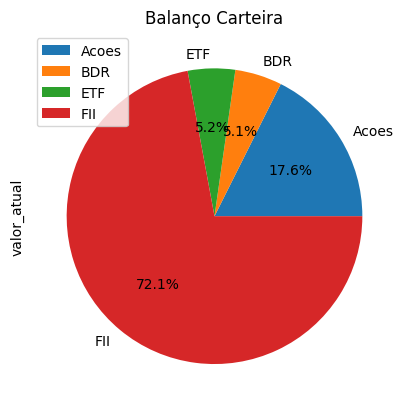

In [19]:
colunas = ['classe', 'valor_atual', 'valor_total']
classe = wallet[colunas]

classe = classe.groupby('classe').sum()
classe['lucro'] = classe['valor_atual'] - classe['valor_total']
classe['lucro_percentual'] = (classe['lucro'] / classe['valor_total']) * 100
classe['lucro_percentual'] = classe['lucro_percentual'].round(2)
classe['peso'] = (classe['valor_atual'] / classe['valor_atual'].sum()) * 100
classe['peso'] = classe['peso'].round(2)
display(classe)

classe.plot(y='valor_atual', kind='pie', autopct='%1.1f%%')
plt.title('Balanço Carteira')
plt.show()
